In [6]:
import numpy as np 
color = tuple(np.random.choice(range(255),size=3))
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [9]:
import numpy as np

color = tuple(np.random.choice(range(255), size=3))
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

class_color_dict = {}

for class_name in classes:
    class_color_dict[class_name] = color

print(class_color_dict)

{'Hardhat': (98, 244, 232), 'Mask': (98, 244, 232), 'NO-Hardhat': (98, 244, 232), 'NO-Mask': (98, 244, 232), 'NO-Safety Vest': (98, 244, 232), 'Person': (98, 244, 232), 'Safety Cone': (98, 244, 232), 'Safety Vest': (98, 244, 232), 'machinery': (98, 244, 232), 'vehicle': (98, 244, 232)}


In [11]:
import numpy as np

color = tuple(np.random.choice(range(255), size=3))
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

class_color_dict = {class_name: color for class_name in classes}

print(class_color_dict['Hardhat'])

(127, 130, 93)


In [13]:
import numpy as np

num_colors = 10
color_list = []

for _ in range(num_colors):
    color = tuple(np.random.randint(0, 256, size=3))
    color_list.append(color)

print(color_list)

[(105, 44, 16), (86, 142, 110), (155, 90, 41), (96, 104, 214), (244, 167, 181), (240, 139, 151), (215, 6, 190), (229, 15, 148), (242, 68, 150), (130, 161, 202)]


In [15]:
color = [(105, 44, 16), (86, 142, 110), (155, 90, 41), (96, 104, 214), (244, 167, 181), (240, 139, 151), (215, 6, 190), (229, 15, 148), (242, 68, 150), (130, 161, 202)]
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

class_color_dict = dict(zip(classes, color))

print(class_color_dict['Hardhat'])


(105, 44, 16)


In [16]:
import random

num_colors = 10
color_list = []

for _ in range(num_colors):
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    color_list.append(color)

print(color_list)

[(2, 206, 25), (172, 107, 72), (178, 143, 30), (162, 156, 105), (215, 20, 93), (159, 70, 11), (142, 52, 108), (143, 152, 137), (80, 169, 71), (115, 112, 143)]


Connected to PostgreSQL


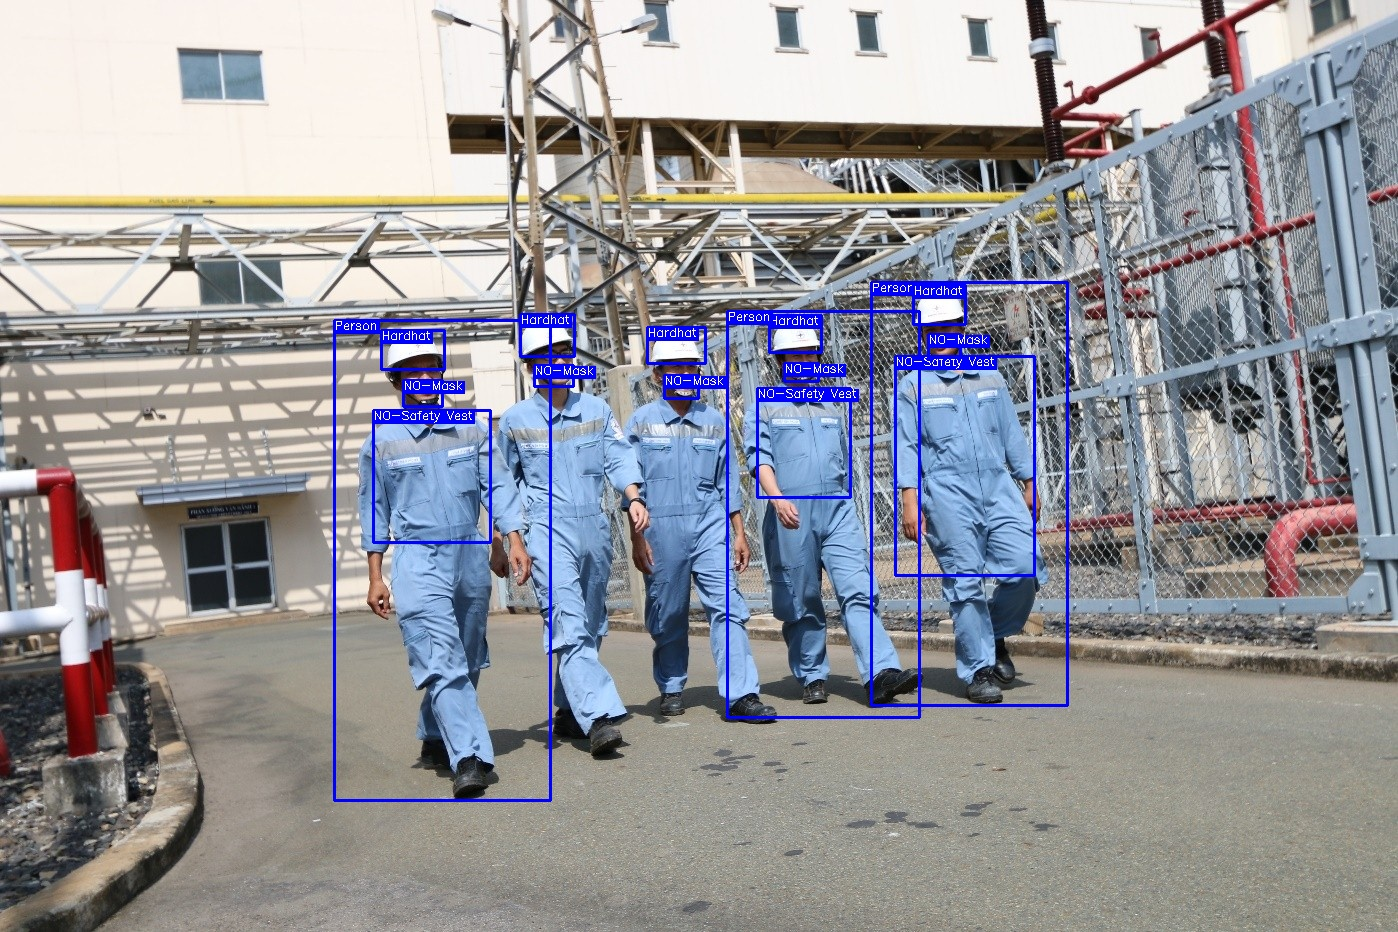

In [15]:
import psycopg2
import io
from PIL import Image
import psycopg2

# Kết nối đến cơ sở dữ liệu PostgreSQL
def connect():
    try:
        conn = psycopg2.connect(
            host="localhost",
            port="5432",
            database="postgres",
            user="postgres",
            password="1234"
            # options="-c search_path=Safety_PPE"
        )
        print("Connected to PostgreSQL")
        cursor = conn.cursor()
        # Tạo schema 'Safety_PPE' nếu chưa tồn tại
        create_schema_query = "CREATE SCHEMA IF NOT EXISTS Safety_PPE;"
        cursor.execute(create_schema_query)

        # Sử dụng schema 'Safety_PPE'
        use_schema_query = "SET search_path TO Safety_PPE, public;"
        cursor.execute(use_schema_query)
        return conn
    except (Exception, psycopg2.DatabaseError) as error:
        print("Failed to connect to PostgreSQL", error)
        
def read_image_from_database(conn, image_id):
    try:
        cursor = conn.cursor()

        # Query to fetch the image data from the database
        query = "SELECT Images FROM IMAGES WHERE ImageID = %s;"
        cursor.execute(query, (image_id,))
        image_data = cursor.fetchone()[0]
        # print(cursor.fetchone()[0])
        print(image_data)

        # Create a BytesIO object to read the image data
        image_stream = io.BytesIO(image_data)

        # Open the image using PIL library
        image = Image.open(image_stream)

        # Save the image to the specified output file
        # image.save(output_file)
        print("Image saved successfully.")
        return image

    except (Exception, psycopg2.DatabaseError) as error:
        print("Failed to read image from database", error)

conn = connect()
abc = read_image_from_database(conn, 1)
abc


In [1]:
a = {
  "detect_objects": [
    {
      "name": "machinery",
      "confidence": 0.8410053849
    },
    {
      "name": "Person",
      "confidence": 0.6900921464
    }
  ],
  "detect_objects_names": "machinery, Person"
}

In [ ]:
for 